Import Python Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame, read_csv
from IPython.display import display_html
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

## Decision Trees as Classifiers

Let's look at the solubility classification dataset similar to notebook 5.

0.748
0.6859999999999999


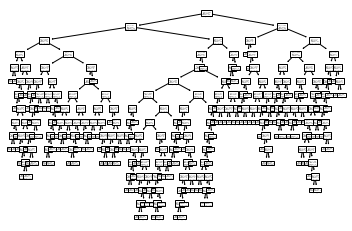

In [ ]:
df = pd.read_csv("solubility_classification.csv")
x = df[['MolLogP','NumHAcceptors','NumHDonors','NumAromaticRings']].values[:1000]
y = np.array(df[['Solubility']].values)[:1000]

#If I wanted a 10-fold cross-validation
#clf = DecisionTreeClassifier(random_state=0)
#print(cross_val_score(clf, x, y, cv=10))

#But here we will do a simple train/test split and then look at the decision
#tree that results
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

clf = DecisionTreeClassifier(random_state=0) #Define decision tree classifier
clf.fit(X_train, y_train); #Fit decision tree classifier
print(clf.score(X_test,y_test)) #Print the classification accuracy for the test set
print(1-np.sum(y)/len(y)) #The naive estimate of guessing the most probable class.
tree.plot_tree(clf); #Plot the tree

Our tree is very large. Let's try limiting the depth and number of samples in the leaves. Our performance will slightly improve. This is basically regularization at work because we are controlling how finely the decision tree discriminates through the data.

0.768


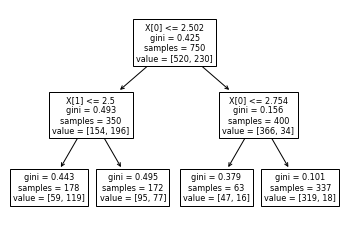

In [ ]:
clf = DecisionTreeClassifier(max_depth = 2, min_samples_leaf=5)
clf.fit(X_train, y_train);
print(clf.score(X_test,y_test))
tree.plot_tree(clf);

We can use the graphviz library to more effectively visualize the tree.

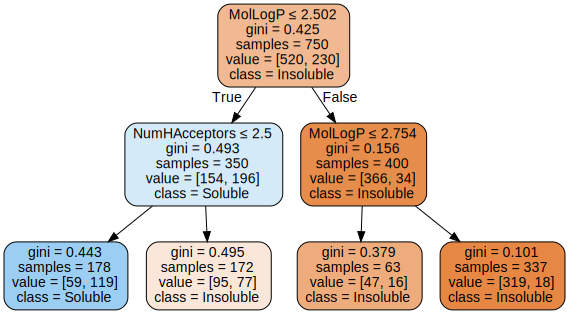

In [ ]:
dt_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=['MolLogP','NumHAcceptors','NumHDonors','NumAromaticRings'],
                                class_names=["Insoluble", "Soluble"],
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dt_data)
graph

Scikit-learn can pre-package the feature importance calculation for you. Again, feature importance is determined by computing the mean change in the gini index (loss) as a function of which feature is being used to split.

Text(0.5, 0, 'Feature')

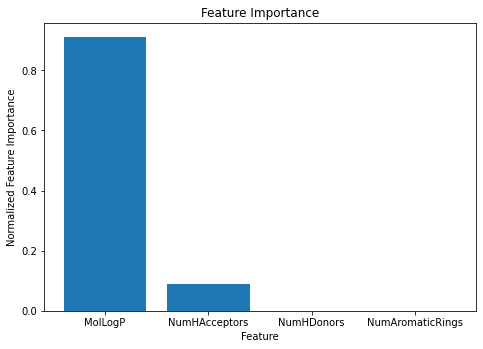

In [ ]:
from matplotlib.pyplot import figure

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(['MolLogP','NumHAcceptors','NumHDonors','NumAromaticRings'], clf.feature_importances_)
plt.title("Feature Importance")
plt.ylabel("Normalized Feature Importance")
plt.xlabel("Feature")


Similarly, we can use sklearn to compute the permutation importance.

<BarContainer object of 4 artists>

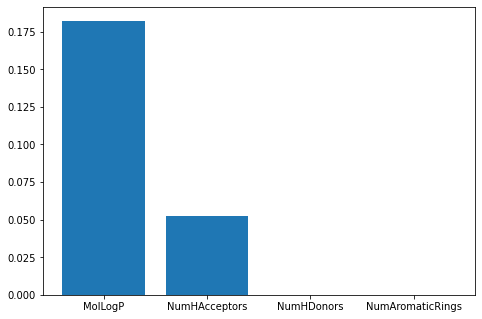

In [ ]:
from sklearn.inspection import permutation_importance
result = permutation_importance(clf, x, y, n_repeats=5,
                                random_state=0)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(['MolLogP','NumHAcceptors','NumHDonors','NumAromaticRings'], result.importances_mean)